# CPSC 8430 Fall 2024 HW_1_1 AM

### 1. Import Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### 2. Define Functions and Generate Data

In [2]:
# Define Functions
x = np.linspace(-1,1,500)  #generate 500 datapoints
y1 = np.sin(0.2*x+1)  #Function 1: sin(0.2x+1)
y2 = 5*(x**2)-0.5*x+0.2 #Function 2: 5x^2-0.5x+0.2
y3 = np.log(np.abs(2*x+0.5))  #Function 3: log(abs(2x+0.5))

# Convert to Pytorch Tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1,1)  #convert to 2D tensor with 1 column
y1_tensor = torch.tensor(y1, dtype=torch.float32).view(-1,1)
y2_tensor = torch.tensor(y2, dtype=torch.float32).view(-1,1)
y3_tensor = torch.tensor(y3, dtype=torch.float32).view(-1,1)

In [3]:
# Check for NaN values
print("Has NaN in y1:", torch.any(torch.isnan(y1_tensor)))
print("Has NaN in y2:", torch.any(torch.isnan(y2_tensor)))
print("Has NaN in y3:", torch.any(torch.isnan(y3_tensor)))

# Check for Inf values
print("Has Inf in y1:", torch.any(torch.isinf(y1_tensor)))
print("Has Inf in y2:", torch.any(torch.isinf(y2_tensor)))
print("Has Inf in y3:", torch.any(torch.isinf(y3_tensor)))

Has NaN in y1: tensor(False)
Has NaN in y2: tensor(False)
Has NaN in y3: tensor(False)
Has Inf in y1: tensor(False)
Has Inf in y2: tensor(False)
Has Inf in y3: tensor(False)


### 3. Define the Models

#### Model 1: DNN with 4 layers

In [4]:
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()
        self.fc1 = nn.Linear(1,10)  #1*10+10 = 20
        self.fc2 = nn.Linear(10,25)  #10*25+25 = 275 
        self.fc3 = nn.Linear(25,10)  #25*10+10 = 260 
        self.fc4 = nn.Linear(10,1)  #10*1+1= 11; Total parameters = 566
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#### Model 2: DNN with 6 layers

In [5]:
class DNN2(nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = nn.Linear(1,5)  #1*5+5 = 10
        self.fc2 = nn.Linear(5,10)  #5*10+10 = 60
        self.fc3 = nn.Linear(10,20)  #10*20+20 = 220
        self.fc4 = nn.Linear(20,10)  #20*10+10 = 210
        self.fc5 = nn.Linear(10,5)  #10*5+5 = 55
        self.fc6 = nn.Linear(5,1)  #5*1+1 = 6; Total parameters = 561

        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

#### Model 3: DNN with 8 layers

In [6]:
class DNN3(nn.Module):
    def __init__(self):
        super(DNN3, self).__init__()
        self.fc1 = nn.Linear(1,5)  #1*5+5 = 10
        self.fc2 = nn.Linear(5,8)  #5*8+8 = 48
        self.fc3 = nn.Linear(8,11)  #8*11+11 = 99
        self.fc4 = nn.Linear(11,11)  #11*11+11 = 132
        self.fc5 = nn.Linear(11,11)  #11*11+11 = 132
        self.fc6 = nn.Linear(11,8)  #11*8+8 = 96
        self.fc7 = nn.Linear(8,5)  #8*5+5 = 45
        self.fc8 = nn.Linear(5,1)  #5*1+1 = 6; Total parameters = 568


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x

### 4. Model Training and Hyperparameter Tuning

In [7]:
# Hyperparameter Tuning Function
def model_training(model, x, y, lr=0.001, optimizer_type="Adam", epochs=10000):
    if optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_type == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=lr)
    else:
        raise ValueError("Unknown optimizer type")
        
    criterion = nn.MSELoss()
    losses = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()  #clear old gradients from last step before next step
        outputs = model(x)  #get model predictions
        loss = criterion(outputs, y)
        loss.backward()  #compute gradients of the loss w.r.t. model parameters
        optimizer.step()  #update model parameters using computed gradients
        losses.append(loss.item())
        
    return losses, outputs.detach().numpy()


def hyperparameter_search(model, x, y, learning_rates, optimizers, epochs=10000):
    best_loss = float('Inf')
    best_hyperparameters = {}
    all_results = {}
    
    for lr in learning_rates:
        for opt in optimizers:
            print(f'Training with lr={lr} and optimizer={opt}')
            
            model_copy = type(model)()  #Create a new instance of the model
            model_copy.load_state_dict(model.state_dict())  #Copy the weights of the original model
            
            losses, outputs = model_training(model_copy, x, y, lr=lr, optimizer_type=opt, epochs=epochs)
            
            all_results[(lr, opt)] = (losses, outputs)
            
            if losses[-1] < best_loss:
                best_loss = losses[-1]
                best_hyperparameters = {'learning_rate':lr, 'optimizer':opt, 'outputs':outputs, 'losses':losses}
                
    return best_hyperparameters, all_results

In [8]:
# Plot functions
def plot_results(losses_dnn1, losses_dnn2, losses_dnn3, x, y_true, y_dnn1, y_dnn2, y_dnn3, function_name):
    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(losses_dnn1, label='DNN1')
    plt.plot(losses_dnn2, label='DNN2')
    plt.plot(losses_dnn3, label='DNN3')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"Loss Curves for {function_name}")
    plt.legend()
    plt.show()

    # Plot ground truth vs model outputs
    plt.figure(figsize=(10, 5))
    plt.plot(x, y_true, label='Ground Truth', color='black', linewidth=2)
    plt.plot(x, y_dnn1, label='DNN1 Output', linestyle='--')
    plt.plot(x, y_dnn2, label='DNN2 Output', linestyle='--')
    plt.plot(x, y_dnn3, label='DNN3 Output', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"Model Outputs vs Ground Truth for {function_name}")
    plt.legend()
    plt.show()

In [9]:
# Function to calculate total number of parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [10]:
# Define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.0001]
optimizers = ["Adam", "SGD", "RMSprop"]
epochs = 5000

# Define the models
model1 = DNN1()
model2 = DNN2()
model3 = DNN3()

# Print number of parameters for each model
print(f"Number of parameters in DNN1: {count_parameters(model1)}")
print(f"Number of parameters in DNN2: {count_parameters(model2)}")
print(f"Number of parameters in DNN3: {count_parameters(model3)}")

Number of parameters in DNN1: 566
Number of parameters in DNN2: 561
Number of parameters in DNN3: 568


#### Function 1: sin(0.2x +1)

Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN1: learning_rate=0.001, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN2: learning_rate=0.001, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with l

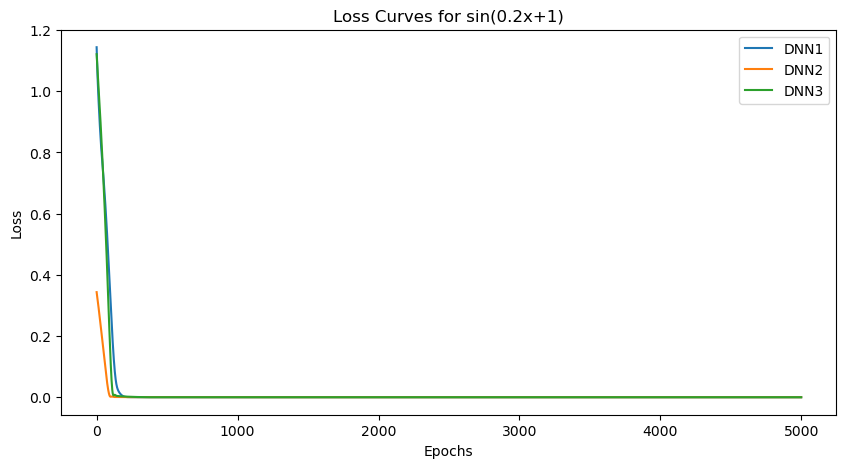

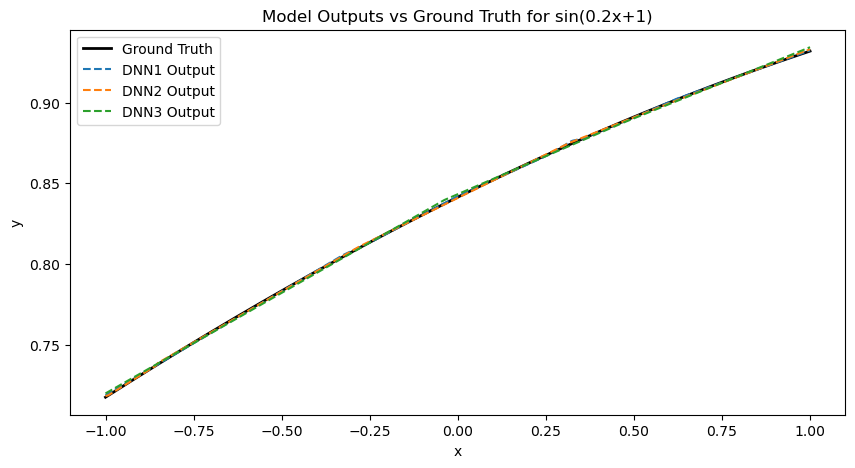

In [11]:
# Train for sin(0.2x +1)
best_hyperparameters1, _ = hyperparameter_search(model1, x_tensor, y1_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN1: learning_rate={best_hyperparameters1['learning_rate']}, optimizer={best_hyperparameters1['optimizer']}")
best_hyperparameters2, _ = hyperparameter_search(model2, x_tensor, y1_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN2: learning_rate={best_hyperparameters2['learning_rate']}, optimizer={best_hyperparameters2['optimizer']}")
best_hyperparameters3, _ = hyperparameter_search(model3, x_tensor, y1_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN3: learning_rate={best_hyperparameters3['learning_rate']}, optimizer={best_hyperparameters3['optimizer']}")

# Plot results for sin(0.2x +1)
plot_results(best_hyperparameters1['losses'], best_hyperparameters2['losses'], best_hyperparameters3['losses'], 
             x, y1, best_hyperparameters1['outputs'], best_hyperparameters2['outputs'], best_hyperparameters3['outputs'], 'sin(0.2x+1)')


#### Function 2: 5x^2-0.5x+0.2

Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN1: learning_rate=0.01, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN2: learning_rate=0.001, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr

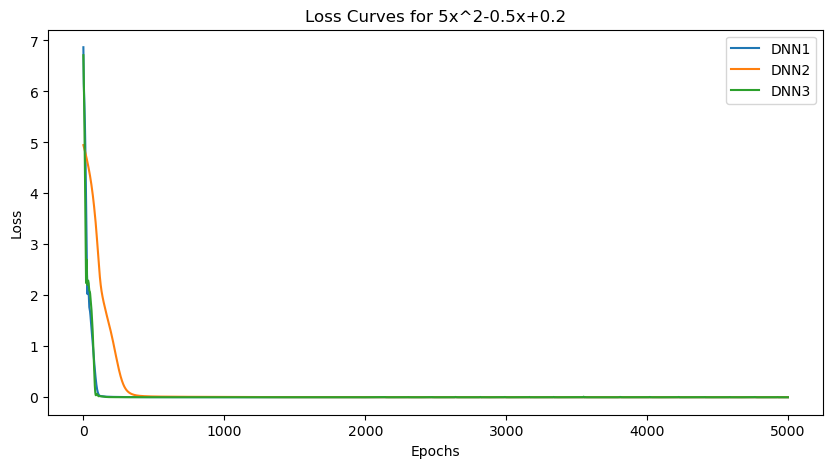

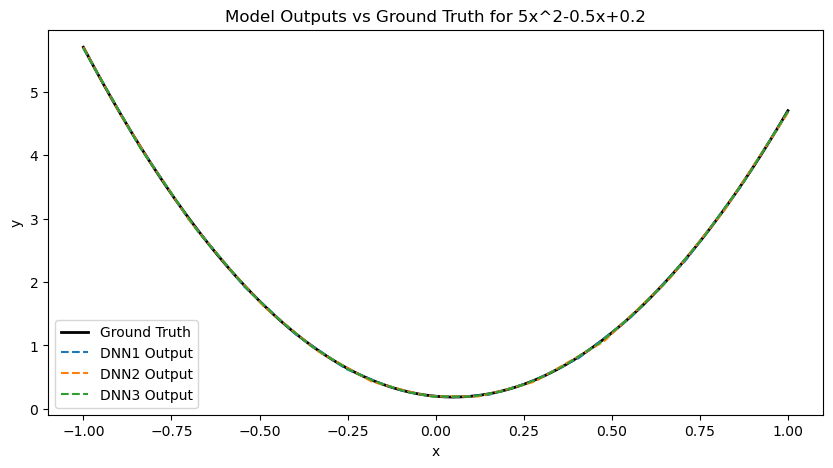

In [12]:
# Train for 5x^2-0.5x+0.2
best_hyperparameters1, _ = hyperparameter_search(model1, x_tensor, y2_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN1: learning_rate={best_hyperparameters1['learning_rate']}, optimizer={best_hyperparameters1['optimizer']}")
best_hyperparameters2, _ = hyperparameter_search(model2, x_tensor, y2_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN2: learning_rate={best_hyperparameters2['learning_rate']}, optimizer={best_hyperparameters2['optimizer']}")
best_hyperparameters3, _ = hyperparameter_search(model3, x_tensor, y2_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN3: learning_rate={best_hyperparameters3['learning_rate']}, optimizer={best_hyperparameters3['optimizer']}")

# Plot results for 5x^2-0.5x+0.2
plot_results(best_hyperparameters1['losses'], best_hyperparameters2['losses'], best_hyperparameters3['losses'], 
             x, y2, best_hyperparameters1['outputs'], best_hyperparameters2['outputs'], best_hyperparameters3['outputs'], '5x^2-0.5x+0.2')

#### Function 3: log(abs(2x+0.5))

Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN1: learning_rate=0.01, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr=0.001 and optimizer=RMSprop
Training with lr=0.01 and optimizer=Adam
Training with lr=0.01 and optimizer=SGD
Training with lr=0.01 and optimizer=RMSprop
Training with lr=0.0001 and optimizer=Adam
Training with lr=0.0001 and optimizer=SGD
Training with lr=0.0001 and optimizer=RMSprop
Best Hyperparameters for DNN2: learning_rate=0.001, optimizer=Adam
Training with lr=0.001 and optimizer=Adam
Training with lr=0.001 and optimizer=SGD
Training with lr

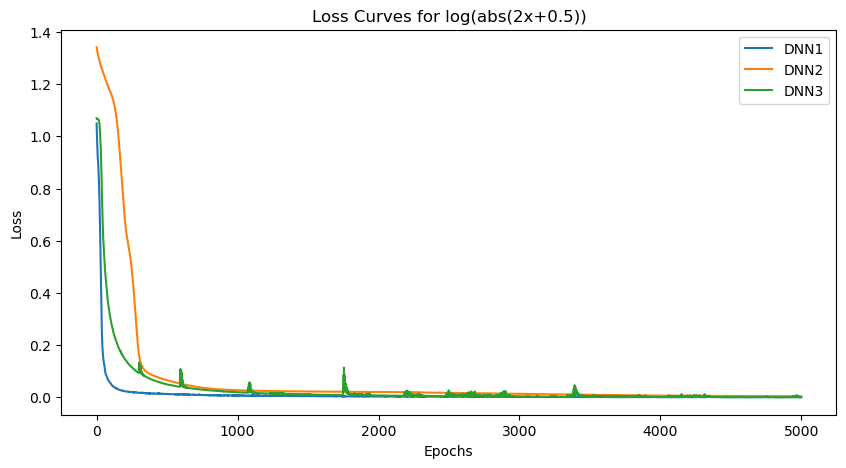

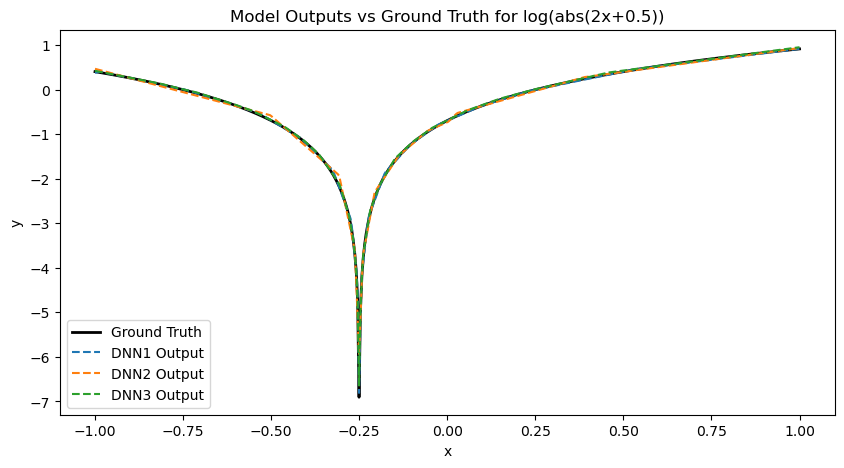

In [13]:
# Train for log(abs(2x+0.5))
best_hyperparameters1, _ = hyperparameter_search(model1, x_tensor, y3_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN1: learning_rate={best_hyperparameters1['learning_rate']}, optimizer={best_hyperparameters1['optimizer']}")
best_hyperparameters2, _ = hyperparameter_search(model2, x_tensor, y3_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN2: learning_rate={best_hyperparameters2['learning_rate']}, optimizer={best_hyperparameters2['optimizer']}")
best_hyperparameters3, _ = hyperparameter_search(model3, x_tensor, y3_tensor, learning_rates, optimizers, epochs)
print(f"Best Hyperparameters for DNN3: learning_rate={best_hyperparameters3['learning_rate']}, optimizer={best_hyperparameters3['optimizer']}")

# Plot results for log(abs(2x+0.5))
plot_results(best_hyperparameters1['losses'], best_hyperparameters2['losses'], best_hyperparameters3['losses'], 
             x, y3, best_hyperparameters1['outputs'], best_hyperparameters2['outputs'], best_hyperparameters3['outputs'], 'log(abs(2x+0.5))')